<a href="https://colab.research.google.com/github/smriti192002/Rossmann--Sales--Prediction/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


### Dirk Rossmann GmbH (usual: Rossmann) is one of the largest drug store chains in Europe with around 56,200 employees and more than 4000 stores.In 2019 Rossmann had more than €10 billion turnover in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain.

### The product range includes up to 21,700 items and can vary depending on the size of the shop and the location. In addition to drugstore goods with a focus on skin, hair, body, baby and health, Rossmann also offers promotional items ("World of Ideas"), pet food, a photo service and a wide range of natural foods and wines. There is also a perfume range with around 200 commercial brands. Rossmann has 29 private brands with 4600 products (as of 2019). In 1997 the first own brands Babydream, Facelle, Sunozon and Winston were introduced. The best-known Rossmann brands are Isana (skin, hair and body care), Alterra (natural cosmetics), domol (cleaning and laundry detergents) alouette (paper tissues etc).

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
#_______________________________________Block 1 _______________________________________________

###importing all the necessary libraries

##for preprocessing
import numpy as np 
import pandas as pd
import math 
from scipy import stats
import datetime 

##for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

##for transformation
from sklearn.preprocessing import MinMaxScaler,StandardScaler

##to split data
from sklearn.model_selection import train_test_split

##libraries for linear models and tree models
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
#to visualise decision trees
from sklearn import tree             
from sklearn.tree import export_graphviz  
#for ensembling 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      
from xgboost import XGBRegressor

##for cross validation and hyperparameter tuning
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##error metrics
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 

##to ignore unneccessary warnings
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
#____________________________________Block2__________________________________________

#mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***Part 1: Data Preprocessing***

### ***Loading Rossmann Stores data***

In [3]:
#_________________________________Block 3_____________________________________________________

#reading a sales data csv file and storing it in sales_data dataframe
file_path = '/content/drive/MyDrive/Datascience/Datasets/'      #path where csv file is stored 
sales_data = pd.read_csv(file_path + 'Rossmann Stores Data.csv')

In [4]:
#_______________________________________Block 4____________________________________________________

#checking for the dimension of the data
sales_data.shape  

(1017209, 9)

*The Sales data have more than 1 Million observations with 9 features*

In [5]:
#__________________________________________Block 5_______________________________________________________

#checking first 5 rows/observations in data 
sales_data.head()   

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### ***Data Dictionary of Sales data***

* *Store - Unique Id of store. We have 1115 stores, thus store Id ranges from 1 -1115*

* *DayOfWeek - Week day on which sale has happened(1-7)*

* *Date - Date on which sales has happened*

* *Sales - How much sale has happened on that particular day*

* *Customers - Number of customers visited to store that particular day*

* *Open - Open indicates whether the store is open on that particular day or not*

 *1 means store open* 

 *0 means store not open*   


* *Promo - If store is running a promo that day or not* 

  *1 means running Promo* 

  *0 means not running promo*


* *SchoolHoliday - Indicates If school holiday effects a store sales that day or not*

  *1 means effect* 

  *0 means no effect*

* *State Holiday - If it's a state holiday on that day and what type of state holiday it is*

  *a = public holiday*

  *b = Easter holiday*

  *c = Christmas* 

  *0 = None*


In [6]:
#___________________________________________Block 6 _________________________________________________

#basic info of dataset 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


*There are no any null values in any column of the dataset* 

In [7]:
#___________________________Block 7_________________________________________________

#checking if there is any duplicates in observations 
print(' Number of duplicates observation in sales data : ', sales_data.duplicated().sum())

 Number of duplicates observation in sales data :  0


*Each observation is unique in the data and does not contain any duplicates*

In [8]:
#________________________________Block 8___________________________________________________

#checking for number of unique values and their counts in some features
print("Number of unique values and there counts in DayofWeek :\n",sales_data['DayOfWeek'].value_counts())
print('--------------------------------------------------------------------------------------------')
print("\nNumber of unique values and there counts in open :\n",sales_data['Open'].value_counts())
print('--------------------------------------------------------------------------------------------')
print("\nNumber of unique values and there counts in Promo :\n",sales_data['Promo'].value_counts())
print('--------------------------------------------------------------------------------------------')
print("\nNumber of unique values and there counts in StateHoliday :\n",sales_data['StateHoliday'].value_counts())
print('--------------------------------------------------------------------------------------------')
print("\nNumber of unique values and there counts in SchoolHoliday :\n",sales_data['SchoolHoliday'].value_counts())

Number of unique values and there counts in DayofWeek :
 5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
--------------------------------------------------------------------------------------------

Number of unique values and there counts in open :
 1    844392
0    172817
Name: Open, dtype: int64
--------------------------------------------------------------------------------------------

Number of unique values and there counts in Promo :
 0    629129
1    388080
Name: Promo, dtype: int64
--------------------------------------------------------------------------------------------

Number of unique values and there counts in StateHoliday :
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
--------------------------------------------------------------------------------------------

Number of unique values and there counts in SchoolHoliday :
 0    835488
1    181721
Name: Schoo

*We see that number of unique values in state holiday, 0, it is appearing twice. Let's check and rectify this*

In [9]:
#______________________________________________Block 9______________________________________

#trying to check if both value of 0 stored in different datatype form(as char and int) and printing its length
print(len(sales_data[sales_data['StateHoliday']==0]))
print(len(sales_data[sales_data['StateHoliday']=='0']))

131072
855087


*Okay so 1 zero stored as character while other as integer. So We'll combine the both and will store both of them as integer*

In [10]:
#_________________________________________Block 10_______________________________________________

#replacing a string character 0 with integer 0 in state holiday column
sales_data['StateHoliday'].replace(to_replace ='0', value = 0, inplace = True)

**Converting a,b,c of stateholiday to public holiday, easter holiday, christmas holiday**

In [11]:
#_______________________________________Block 11________________________________________________________

#function to convert a,b,c of state holidays to meaningful name
def stateholiday_name_conversion(x):
  if x =='a':
    return 'PublicHoliday'
  if x=='b':
    return 'Easter'
  if x=='c':
    return 'Christmas'
  else:
    return 0 



In [12]:
#___________________________________________Block 12__________________________________________________________

#applying above defined functuion to change the value of stateholiday feature accordingly
sales_data['StateHoliday'] = sales_data['StateHoliday'].apply(stateholiday_name_conversion)

In [13]:
#_____________________________________________Block 13_________________________________________________________

#different values and their count in stateholiday
sales_data['StateHoliday'].value_counts()

0                986159
PublicHoliday     20260
Easter             6690
Christmas          4100
Name: StateHoliday, dtype: int64

*State holiday values has been converted to meaningful names and most of them have zero value i.e. no state holiday*

In [14]:
#_____________________________________________Block 14_____________________________________________________________

#checking for no. of unique stores in sales data
sales_data['Store'].nunique()

1115

*So we have data for all 1115 unique stores in our sales data*

---



### ***Loading complementary stores data for each store info***




In [15]:
#______________________________________________Block 15_________________________________________________________

#reading a csv file store.csv in stores_data dataframe
stores_data = pd.read_csv(file_path + 'store.csv')

In [16]:
#___________________________________________Block 16_____________________________________________________________

#checking first 5 rows/observations in a data 
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
#__________________________________________Block 17____________________________________________________

#basic info of stores data 
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


*Data has 1115 observations and each observations corresponds to specific store*

*We can see there are some missing values in stores data. Let's check number of missing values in each column of the stores data*

In [18]:
#_____________________________________________Block 18________________________________________________________

#checking for null values in stores_data
stores_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

*Data contain too many null values*

*Let's explore these variables to find out if the missing values are missing completely at random or there is any relationship between missing values of different variables, so that we can find out best imputation method to treat these null values*



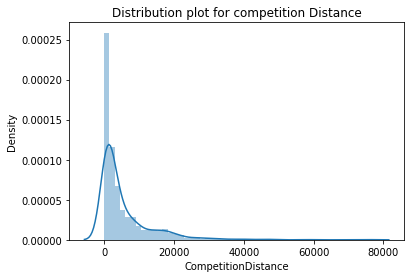

In [19]:
#____________________________________________Block 19_______________________________________________________________

#to check distribution of competition distance
sns.distplot(stores_data['CompetitionDistance'])    #distribution plot
plt.title('Distribution plot for competition Distance')   #to give title
plt.show()

*Competition distance has outlier values as well, so let's replace null values of competition distance with median of given competition distance values*

In [20]:
#_____________________________________Block 20__________________________________________________________________________

#comptetion distance has only three missing values we can replace these three null values with median
stores_data['CompetitionDistance'].fillna(stores_data['CompetitionDistance'].median(), inplace = True)

In [21]:
#___________________________________________Block 21______________________________________________________________________

#checking if both comptetionOpenSinceMonth and ComptetionOpenSinceYear have null values in same observations 
len(stores_data[(stores_data['CompetitionOpenSinceMonth'].isnull()) & (stores_data['CompetitionOpenSinceYear'].isnull())])

354

*Every observation that has null value in comptetionsincemonth also have null value in comptetionsinceyear.*

*So for the stores where there is no information when competitors store has set up we have null values there*

*We'll replace these values with zero as there is no possible value for these other than 0*

In [22]:
#___________________________________________Block 22_________________________________________________

#Filling all null values with zero in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear'
stores_data['CompetitionOpenSinceMonth'].fillna(0, inplace = True )
stores_data['CompetitionOpenSinceYear'].fillna(0, inplace = True)

In [23]:
#______________________________________________Block 23__________________________________________________

#checking unique values in Promo2 feature of stores_data
stores_data['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [24]:
#____________________________________________Block 24___________________________________________________

#checking if promo2sinceweek, promo2sinceyear, promointerval has null values only at the places where promo2 is 0
print('Number of observations where Promo2 is 0 : ',len(stores_data[stores_data['Promo2']==0]))
print('\nNumber of Null values in other features where promo2 is equal to zero : ')
stores_data[stores_data['Promo2']==0].isnull().sum()

Number of observations where Promo2 is 0 :  544

Number of Null values in other features where promo2 is equal to zero : 


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

*Stores that have value as 0 in promo2(stores that not participated in promotions) have values as null in other three promos related columns*

*It makes sense as well if store is not participating in promo they cannot have promotion data or details*

*So we'll replace these value with zero rather than dropping a column as promotion details might be useful in sales analysis*

In [25]:
#_____________________________________________Block 25___________________________________________________

#replacing null values of promotional details with zero 
promo_columns = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for col in promo_columns:
  stores_data[col].fillna(0, inplace = True)

*As year, month and week cannnot be fractional so ideally it should be int type inspite of float. So we'll convert CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear into int*

In [26]:
#___________________________________________Block 26_________________________________________________________

#datatype conversion
stores_data['CompetitionOpenSinceMonth'] = stores_data['CompetitionOpenSinceMonth'].astype('int64')
stores_data['CompetitionOpenSinceYear'] = stores_data['CompetitionOpenSinceYear'].astype('int64')
stores_data['Promo2SinceWeek'] = stores_data['Promo2SinceWeek'].astype('int64')
stores_data['Promo2SinceYear'] = stores_data['Promo2SinceYear'].astype('int64')

In [27]:
#________________________________________Block 27___________________________________________________

#basic info of dataset 
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 87.2+ KB


*We are done with null value treatment*

*Converting a,b,c of assortment to basic, extra, extended respectively*

In [28]:
#_________________________________________Block 28___________________________________________________

#function to replace a,b,c in assortment with real meaningful names
def assortment_name_conversion(x):
  if x =='a':
    return 'Basic'
  if x=='b':
    return 'Extra'
  if x=='c':
    return 'Extended'
  

In [29]:
#____________________________________________Block 29_______________________________________________________

#applying above defined function to change the values of assortment feature accordingly
stores_data['Assortment'] = stores_data['Assortment'].apply(assortment_name_conversion)

*Done with basic cleaning and null values treatment in both dataframes*

*Now we will merge these two dataframes into one*

In [30]:
#_____________________________________________Bock 30_____________________________________________________

#merging stores_data and sales_data on store id and creating train data
rossman_stores_data = pd.merge(sales_data,stores_data, how = 'inner', on = 'Store')

In [31]:
#_____________________________________________Block 31_________________________________________________________

#checking first 5 rows of merged data 
rossman_stores_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0


In [32]:
#____________________________________________________Block 32________________________________________________

#checking for shape of merged data
rossman_stores_data.shape

(1017209, 18)

*Date feature analysis*

In [33]:
#_______________________________________________Block 33______________________________________________________

#checking for number of unique values in date columns
rossman_stores_data['Date'].nunique()

942

*We have data for 942 dates and it won't be easy and quite useful as well to explore data over each date*

*We will segregate a year, month and date from date column and store it as a seperate feature to use it for our further analysis*

In [34]:
#________________________________________________Block 34______________________________________________________________

#segregating month from Date Column and storing it in month variable
rossman_stores_data['month'] = pd.DatetimeIndex(rossman_stores_data['Date']).month
#segregating year from Date Column and storing it in year variable
rossman_stores_data['year'] = pd.DatetimeIndex(rossman_stores_data['Date']).year
#segregating day of month from Date Column and storing it in day variable
rossman_stores_data['DateOfMonth'] = pd.DatetimeIndex(rossman_stores_data['Date']).day
#number of week of year(out of 52 weeks)
rossman_stores_data['WeekofYear'] = pd.DatetimeIndex(rossman_stores_data['Date']).week

In [35]:
#____________________________________________Block 35___________________________________________________________________________

#checking first 5 rows of data 
pd.set_option('max_columns', None)    #to show all the columns of the dataframe
rossman_stores_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,DateOfMonth,WeekofYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0,7,2015,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0,7,2015,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0,7,2015,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0,7,2015,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,Basic,1270.0,9,2008,0,0,0,0,7,2015,27,31


*Open feature analysis*

In [36]:
#_____________________________________________________Block 36______________________________________________________

#checking value counts of open feature 
rossman_stores_data['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [37]:
#____________________________________________________Block 37__________________________________________________________

#creating two subframes one contains a data for store that is open and other one contains data when store is closed 
close_store_data = rossman_stores_data[rossman_stores_data['Open']==0]
open_store_data = rossman_stores_data[rossman_stores_data['Open']==1]

*Lets analyse close_store_data first*

In [38]:
#___________________________________________________Block 38______________________________________________________________

#checking length of close store_data and values of sales and customers in data correspondingly
print('Length of close store data : ', len(close_store_data))
print('No. of unique values and their counts in sales : \n', close_store_data['Sales'].value_counts())
print('No. of unique values and their counts in customers : \n', close_store_data['Customers'].value_counts())

Length of close store data :  172817
No. of unique values and their counts in sales : 
 0    172817
Name: Sales, dtype: int64
No. of unique values and their counts in customers : 
 0    172817
Name: Customers, dtype: int64


*okay so when a store is closed sales and number of customers is zero. Well that is already comprehensible*

*Lets check for state holiday in close store data to know whether stores are mostly closed on state holidays or not* 

In [39]:
#______________________________________________Block 39_____________________________________________________________________

#to check if most of the state holidays are under close_store_data
print("Number of state holidays in a complete train data:", len(rossman_stores_data[rossman_stores_data['StateHoliday']!=0]))
print("Number of state holidays in close_store_data:",len(close_store_data[close_store_data['StateHoliday']!=0]))

Number of state holidays in a complete train data: 31050
Number of state holidays in close_store_data: 30140


*From the above block, we can observe that stores are closed on most of the state holidays or most of the stores are closed on state holidays except few*

*Let's analyse open_store_data*

In [40]:
#_____________________________________Block 40____________________________________________________________________

#to check if there are observations for which store is open but sales is zero
print('Number of observations for which store is open but sales is zero :',len(open_store_data[open_store_data['Sales']==0]))

Number of observations for which store is open but sales is zero : 54


*So, we have 54 observation in our data where store is open but still sales is zero.*

*Let's try to find possible reason behind it*

In [41]:
#________________________________________Block 41________________________________________________________________

#to check customer visit for the stores which are open but have 0 sales
open_store_data[open_store_data['Sales']==0][['Customers','Sales']]

,Customers,Sales
22589,0,0
22590,0,0
25212,0,0
25213,0,0
25214,0,0
51491,0,0
92570,0,0
92582,0,0
205303,0,0
210424,0,0


*okay, so we found that stores which are open but have zero sales are the ones which have 0 customers on these particular days except two which have 5 and 3 customers which is also very low number. So, possible reason for these stores to have 0 sales is no customer visit or very low no. of customers visit*

*Stores that have open = 0(stores that are closed) and stores having zero sales won't be any useful for our sales analysis as they have 0 sales due to closed store or no customer visit*

*Considering the data where open = 1 and also drop open variable as it has constant value of 1 so it will be of no use for further analysis*

In [42]:
#_________________________________________Block 42__________________________________________________________

#keeping all those columns where sales > 0 and open = 1
rossman_stores_data = rossman_stores_data[(rossman_stores_data['Open']==1) & (rossman_stores_data['Sales']>0)]
#dropping open variable
rossman_stores_data.drop(columns=['Open'], inplace= True)

In [43]:
#_____________________________________ Block 43_______________________________________________________

#info on data
rossman_stores_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  int64  
 12  CompetitionOpenSinceYear   844338 non-null  int64  
 13  Promo2                     8

# ***Part 2: Exploratory Data Analysis***

##***Customer Analysis***

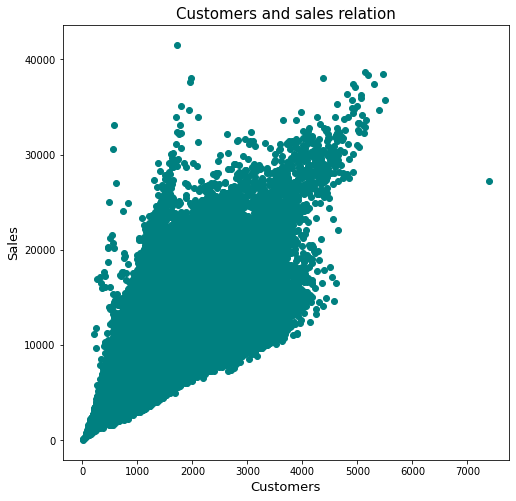

In [44]:
#___________________________________Block 44_____________________________________________________

#scatter plot to check relationship between customer and sales
fig1 = plt.figure(figsize=(8,8))   #defining figure
ax = fig1.gca()   #to get current axes
plt.scatter(rossman_stores_data['Customers'], rossman_stores_data['Sales'],color='teal')   #scatter plot
plt.xlabel('Customers',fontsize=13)   #labelling x-axis
plt.ylabel('Sales',fontsize=13)      #labelling y-axis
plt.title('Customers and sales relation',fontsize=15)  #title for graph
plt.show()

*Relation seems to be linear between customers and sales but seems to have high variance*

*Also Graph  helps us conclude that although there are some stores that have a same customer visit still some have higher sales and some have lower sales*

*It can be dependable on many factors like competitors distance, promo,etc*



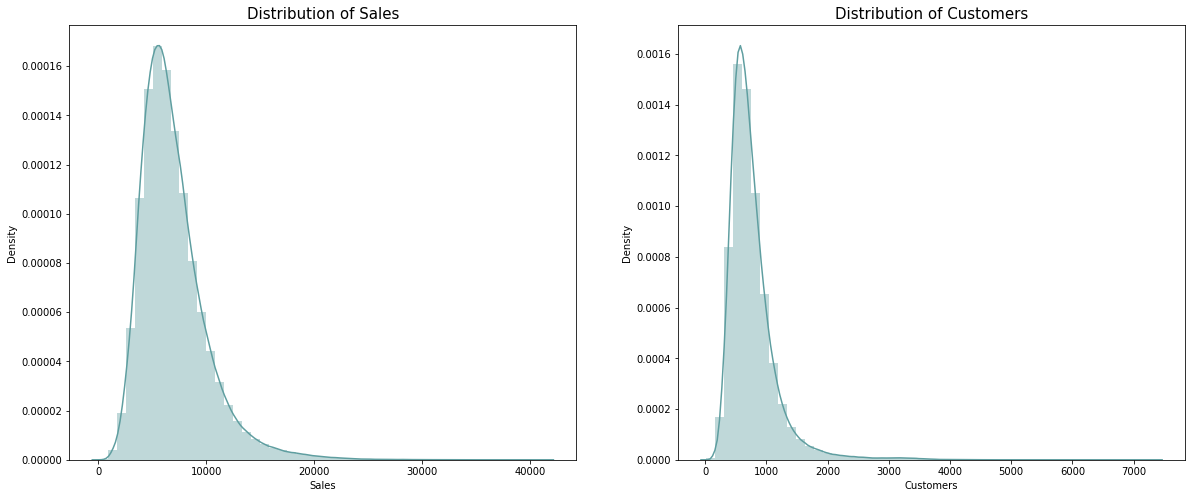

In [45]:
#___________________________________________Block 45__________________________________________________________

#to check distribution of sales and customers
fig,axes= plt.subplots(1,2,figsize=(20,8))  #defining figure and initialising axes   
sns.distplot(rossman_stores_data['Sales'],color='cadetblue',ax=axes[0])  #distribution plot of sales
axes[0].set_title('Distribution of Sales',fontsize=15)  #title for plot
sns.distplot(rossman_stores_data['Customers'],color='cadetblue',ax=axes[1])  #distribution plot of sales
axes[1].set_title('Distribution of Customers',fontsize=15) 
plt.show()

*Most of the stores are having sales between 5000 and 10000 and customers between 500 and 1000  with few of them hving below and above that range* 

*Sales have outliers but these outliers are getting defined by customers higher the customers visit greater the sales*

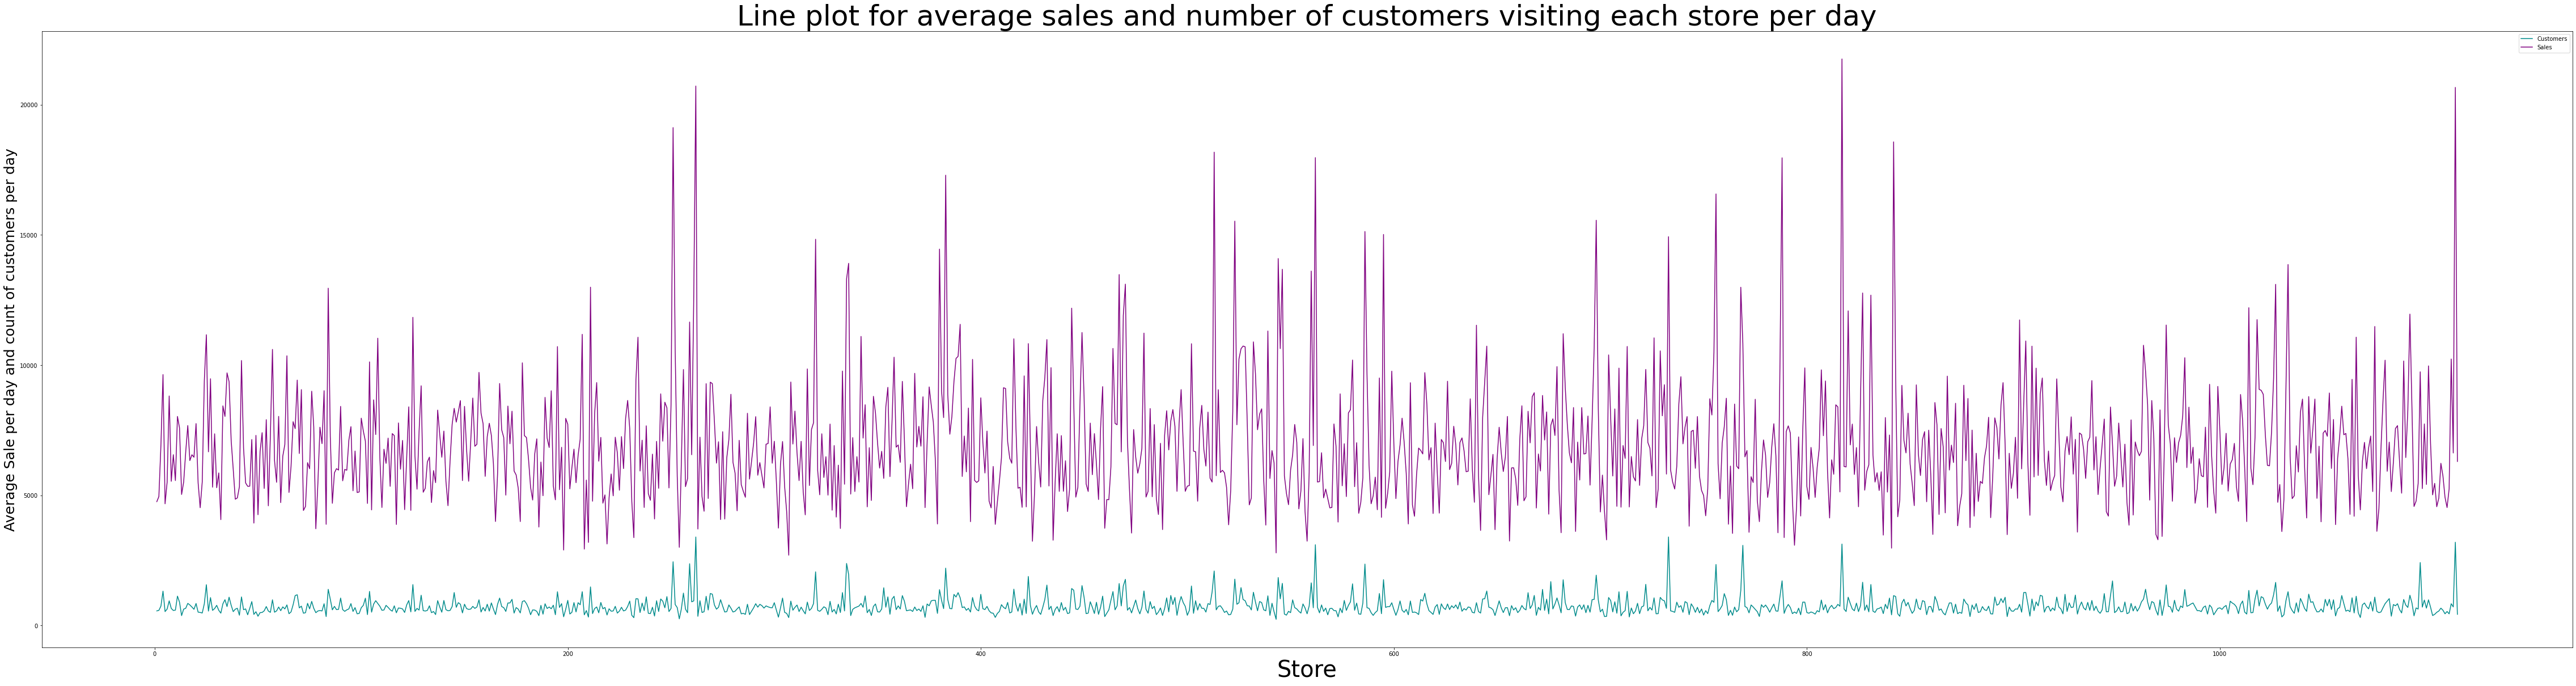

In [46]:
#__________________________________________Block 46_______________________________________________________

#line plot for average sale and customer visit per day of each store
fig = plt.figure(figsize=(80,20))
axs = fig.gca()  #to get current axes
rossman_stores_data.groupby('Store').agg({'Customers':'mean','Sales':'mean'}).plot( color=['darkcyan','purple'],ax =axs)  #line plot 
plt.title('Line plot for average sales and number of customers visiting each store per day',fontsize=50)  #title for plot
plt.xlabel('Store',fontsize=40)
plt.ylabel('Average Sale per day and count of customers per day',fontsize=25)  #label on y-axis for the plot
plt.show()

*From above plot also we can convict that yes stores with higher customers have higher sales*

## ***Date related analysis (Year,month, date of month , day of week, week of year)*** 

*Lets check for year, months and day if sales or customers count is varying due to years, months and day*

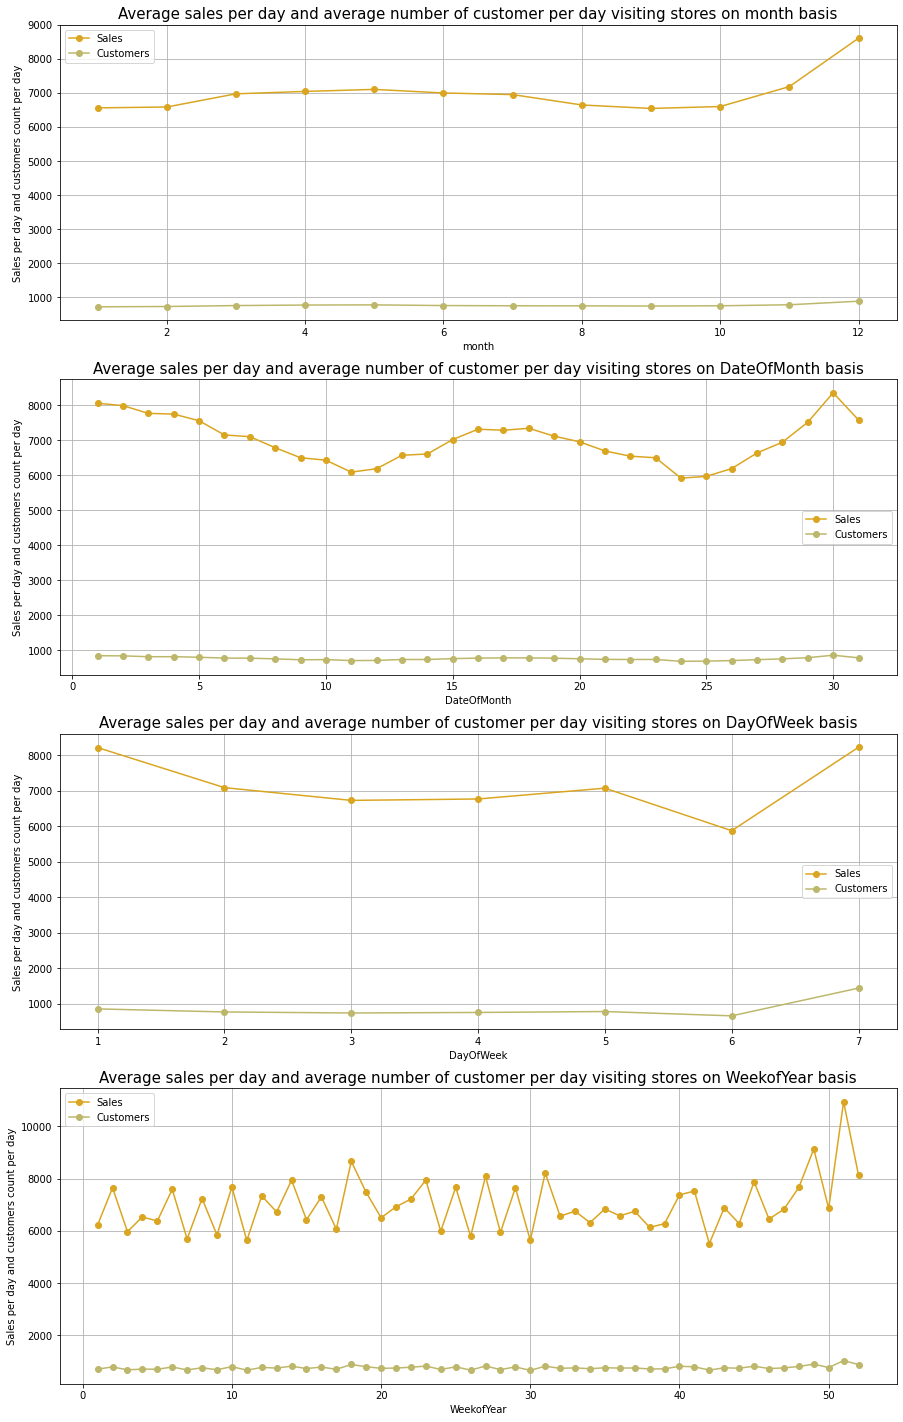

In [47]:
#______________________________________Block 47_____________________________________________________

#visualising average sales and average no. of customers visiting the store on various basis(monthly,dayof week,week of year and date of month)
fig,axs = plt.subplots(4,1, figsize=(15,25))  #initialising figure canvas
date_features = ['month','DateOfMonth',"DayOfWeek",'WeekofYear' ]  #storing all columns related to Date data in date_feature list
#line plot 
for i in range(4):
  dates_graph = rossman_stores_data.groupby(date_features[i]).agg({'Sales':'mean','Customers':'mean'}).plot(marker = 'o', ax =axs[i],
                                                                                                     color=['goldenrod','darkkhaki'])
  dates_graph.set_ylabel('Sales per day and customers count per day')
  dates_graph.set_title('Average sales per day and average number of customer per day visiting stores on '+ date_features[i] +' basis',fontsize=15)
  dates_graph.grid()  # to show grid lines for ease of comprehending graphs


*In Regards to month sales and customers graph we can depict that number of  customers visiting store per day is almost similar every month and for sales per day there is a quite surge in daily sales in 12th month which is also a festive month(christmas and New Year) and week of the year graphs gives a prove of that as well you can see a surge in 51st week*

*In Regards to Date of month sales and customers graph there is not any such a great depiction but still even almost same no. of customers customers visiting store sales is higher in starting and ending of months*

*In Regards to day of week sales and customers graph we can see surge in sales on Monday and Sunday and also number of  customers visiting store is higher on sundays and almost similar for other weekdays*


In [48]:
#_______________________________________________Block 48__________________________________________

#to find average number of stores operating each day of week 
total_stores_eachweekday= list(rossman_stores_data['DayOfWeek'].value_counts())  #taking counts of no. of observations on weekday basis
weekday_count = list(rossman_stores_data.groupby(['DayOfWeek']).agg({'Date':'nunique'}).values)  #getting unique dates for each weekday from data
stores_op_each_dayofweek=[]   #empty list to store average no. of stores operating on each weekday
for i in range(len(total_stores_eachweekday)):
  stores_op_each_dayofweek.append(int(total_stores_eachweekday[i]/weekday_count[i]))

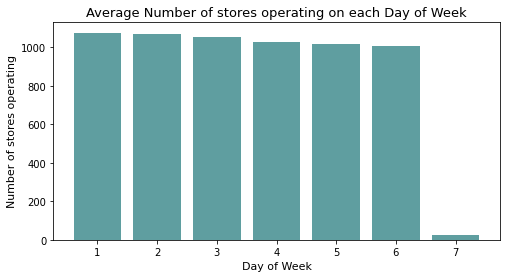

In [49]:
#___________________________________________Block 49____________________________________

#plotting the data for average no. of stores operating on each day of week
plt.rcParams['figure.figsize']=(8,4)   #defining figure 
plt.bar(x = [1,2,3,4,5,6,7], height= stores_op_each_dayofweek,color='cadetblue')  #bar plot
plt.xlabel('Day of Week',fontsize=11) #to show x-axis label on the plot
plt.ylabel('Number of stores operating',fontsize=11)   #to show y-axis label on the plot
plt.title('Average Number of stores operating on each Day of Week',fontsize=13)  #to show title of the plot
plt.show()

*We can simply see that where on other weekdays near to 1000 or above stores are opened and operating whereas on sundays on an average less than 50 stores are opened and thus resulting in increasing sale value for store on that day* 

*Most of the stores are closed on sundays thats why the rare ones that are operating on sunday are getting surge in sales on sundays*

*And the same reason as most of stores are closed on sundays then on next day of opening that is on monday they are getting bit higher sales*

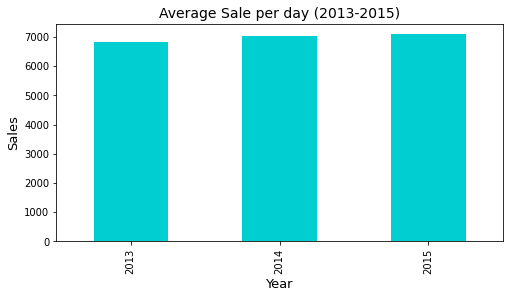

In [50]:
#______________________________________________BLOCK 50_________________________________________________

#checking for average sale stores made each year 
axs = rossman_stores_data.groupby('year')['Sales'].mean().plot.bar(color='darkturquoise')  #to find average sales made by stores each year  
axs.set_xlabel('Year',fontsize=13)
axs.set_ylabel('Sales',fontsize=13)
axs.set_title('Average Sale per day (2013-2015)',fontsize=14)
plt.show()

*Company Sales are growing at a slow pace every year. In 2013 on an average stores were having sales less than 7000 per day whereas in 2015 it was more than 7000 per day*

